#

## *Plan*
1. Merging the data
2. Clean data and seperate the data by patch
2. Visual parts of the data to find connections between values
3. Create a model to classifiy our findings


In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, plot_roc_curve


Now we import the data and look at the first elements

In [2]:
data = pd.read_csv(r'data/high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Summary of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Checking if there are any missing values

In [4]:
data.isna().values[data.isna().values==True]

array([], dtype=bool)

As we can see there are no missing values, we will now remove unnecessary data

### Visualization
We will now visualize the all the correlations between the columns

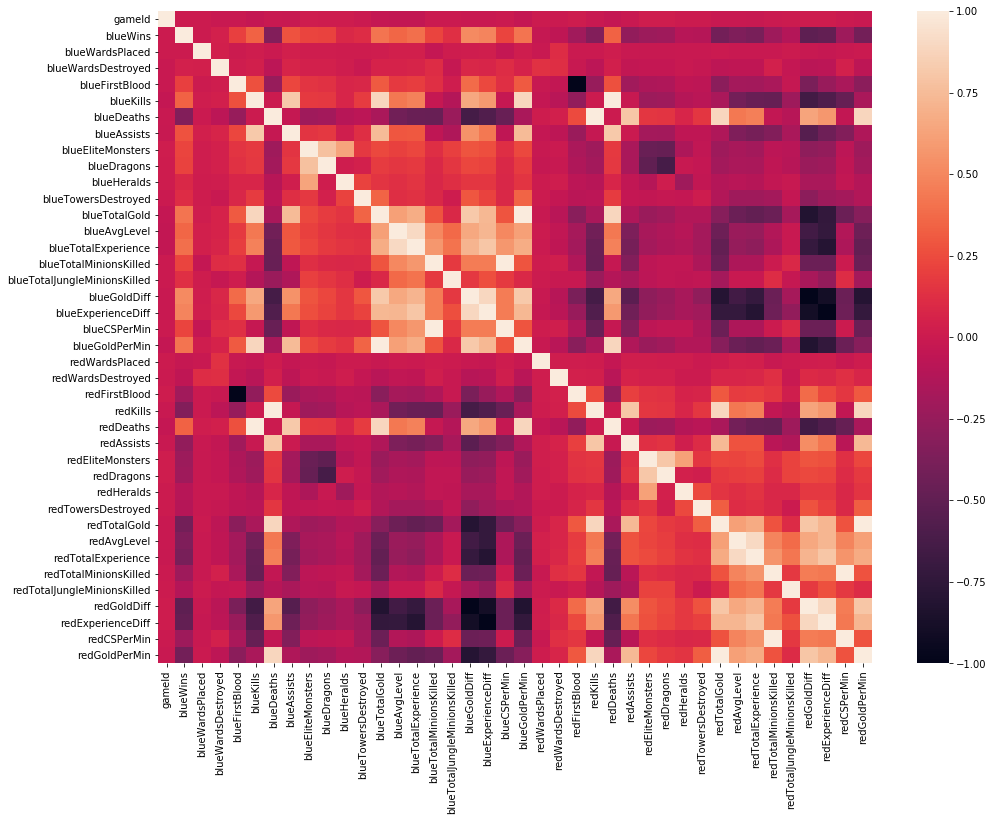

In [5]:
#Creating a correlation map
matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix)
#,cmap=LinearSegmentedColormap.from_list("myCmap", ["red","blue"], N=60)
plt.show()

We want to see what variables have an affect on whever blue wins or not

In [6]:
blueWinsCorr = matrix["blueWins"]
blueWinsCorr = blueWinsCorr.reindex(blueWinsCorr.abs().sort_values().index)[::-1]
blueWinsCorr

blueWins                        1.000000
redGoldDiff                    -0.511119
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
redExperienceDiff              -0.489558
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
redGoldPerMin                  -0.411396
redTotalGold                   -0.411396
blueTotalExperience             0.396141
redTotalExperience             -0.387588
blueAvgLevel                    0.357820
redAvgLevel                    -0.352127
blueDeaths                     -0.339297
redKills                       -0.339297
redDeaths                       0.337358
blueKills                       0.337358
blueAssists                     0.276685
redAssists                     -0.271047
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueEliteMonsters               0.221944
redEliteMonsters               -0.221551
blueDragons                     0.213768
redCSPerMin     

### Usefull features:
1. blueGoldDiff
2. blueExperienceDiff
3. blueGoldPerMin
4. redGoldPerMin
5. blueTotalExperience
6. redTotalExperience
7. blueAvgLevel
8. redAvgLevel
9. blueDeaths
10. blueKills
11. blueAssists
12. redAssists
13. blueCSPerMin
14. blueEliteMonsters
15. redEliteMonsters
16. blueDragons
17. redCSPerMin
18. redDragons
19. blueFirstBlood
20. blueTotalJungleMinionsKilled
21. blueTowersDestroyed
22. redTotalJungleMinionsKilled
23. redTowersDestroyed
24. redHeralds
25. blueHeralds
26. redWardsDestroyed
27. blueWardsDestroyed
28. redWardsPlaced
29. blueWardsPlaced

### Unnecessary features and reasons

redGoldDiff = -blueGoldDiff

redExperienceDiff = -blueExperienceDiff 

blueTotalGold = blueGoldPerMin

redTotalGold = redGoldPerMin

redKills = blueDeaths

redDeaths = blueKills

blueTotalMinionsKilled = blueCSPerMin

redTotalMinionsKilled = redCSPerMin

redFirstBlood = -blueFirstBlood

gameId - not a stat in the game 

In [7]:
df = data.drop(columns=["redGoldDiff","redExperienceDiff","blueTotalGold","redTotalGold","redDeaths","redKills","blueTotalMinionsKilled","redTotalMinionsKilled","redFirstBlood","gameId"])
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,6.8,17047,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,6.8,17438,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,6.8,17254,28,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,7.0,17961,47,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,7.0,18313,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,7,0,0,0,0,6.8,16498,34,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,3,0,0,0,0,7.0,18367,56,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,11,1,1,0,0,7.4,19909,60,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,1,0,0,0,0,7.2,18314,40,24.7,1529.8


We wil now change the binary value of blueWins to the winner, so that will be either red side for 0 and blue side for 1

In [8]:
df['blueWins'] = df['blueWins'].map({0: "Red", 1: "Blue"})
df.rename(columns={'blueWins': "Winner"},inplace=True)

In [9]:
df
allModels=[]

## Helper functions
Functions that we will use later to display the results

In [10]:
def showAccuracy(expect,prediction):
    print("Accuracy score:",accuracy_score(expect, prediction))
    print("Report:\n",classification_report(expect,prediction))
    return accuracy_score(expect, prediction)

In [11]:
def showRocCurve(testData,expect,prediction,classifier,curves=[]):
    print("Roc curve:")
    #random guess, should be about 50/50 in getting the correct prediction for each element
    randomGuess = [np.random.randint(0,1) for i in range(len(expect))]
    #get the false positive rate and true positive rate
    falsePosRate, truePosRate, _ = roc_curve(expect.map({"Red": 0, "Blue": 1}),randomGuess)
    
    #plot roc curve of our classifier 
    rCurve = plot_roc_curve(estimator=classifier,X=testData,y=expect)
    print(type(rCurve))
    #plot roc curve of the random guesses
    plt.plot(falsePosRate, truePosRate, linestyle='--', color='blue')
    for i in curves:
        if type(i)==type(rCurve):
            i.plot(ax=rCurve.ax_)
    plt.show()
    return rCurve

In [12]:
def showConfusionMatrix(expect,prediction,name=''):
    #size
    plt.figure(figsize=(8,6))
    conMatrix = confusion_matrix(expect,prediction)
    #name of groups
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    #amout in each group
    group_counts = [value for value in conMatrix.flatten()]
    #percentage
    group_percentages = [str('{0:.2f}'.format(value*100))+"%" for value in conMatrix.flatten()/np.sum(conMatrix)]
    #put the values together
    labels = [str(name)+"\n"+str(amount)+"\n"+str(percent) for name,amount,percent in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #show confusion matrix
    plot = sns.heatmap(conMatrix,annot=labels,fmt="",cmap='Reds',xticklabels=["Red","Blue"],yticklabels=["Red","Blue"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plot.set_title(str(name)+"\nConfusion matrix:")
    plt.savefig("assets/"+name+".png",dpi=750)
    return "assets/"+name+".png"


## KNN
Now that we have our data we can proceed to make a model that predicts if blue team will win

In [13]:
data = df.drop(columns="Winner")
exp = df["Winner"]
trainD, testD, trainE, testE = train_test_split(data, exp)

### K=5
We will use a KNN model with k=5 as a baseline model and try to make a better one

In [14]:
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(trainD,trainE)
pred = knn.predict(testD)
baseLineModel={'prediction':pred,'confusion matrix':None,'accuracy':0,'roc curve':None}

In [15]:
baseLineModel['accuracy'] = showAccuracy(testE,pred)

Accuracy score: 0.6927125506072874
Report:
               precision    recall  f1-score   support

        Blue       0.70      0.67      0.68      1232
         Red       0.69      0.72      0.70      1238

    accuracy                           0.69      2470
   macro avg       0.69      0.69      0.69      2470
weighted avg       0.69      0.69      0.69      2470



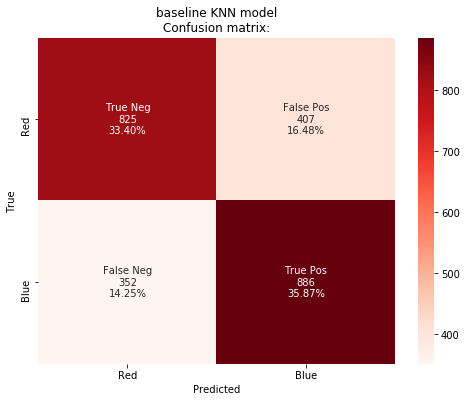

In [16]:
baseLineModel['confusion matrix'] = showConfusionMatrix(testE,pred,name="baseline KNN model")

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


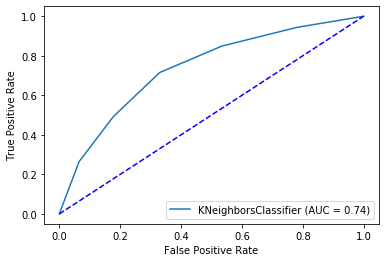

In [17]:
baseLineModel['roc curve'] = showRocCurve(testD,testE,pred,knn)

### Finding the most optimal hyperparameters for our model
Our goal is to find a model that is better than our baseline model

In [18]:
#paramaters that may effect the classifications
#we dont need to check the linear kernel since it takes a large amount of time and the linear function is unstable for this dataset
param_grid=[
    {'n_neighbors':[i for i in range(1,31)],'weights':['uniform','distance']}
]
#change n_jobs for faster/slower performance
gridSearch = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True,verbose=4,n_jobs=2)

In [19]:
gridSearch.fit(trainD,trainE)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   14.1s
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:   35.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:   50.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=4)

In [20]:
knn_clf = gridSearch.best_estimator_
knn_clf.fit(trainD,trainE)
knn_pred = knn_clf.predict(testD)
knnModel = {'prediction':knn_pred,'confusion matrix':None,'accuracy':0,'roc curve':None}
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [21]:
knnModel['accuracy'] = showAccuracy(testE,knn_pred)

Accuracy score: 0.7186234817813765
Report:
               precision    recall  f1-score   support

        Blue       0.73      0.70      0.71      1232
         Red       0.71      0.74      0.72      1238

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



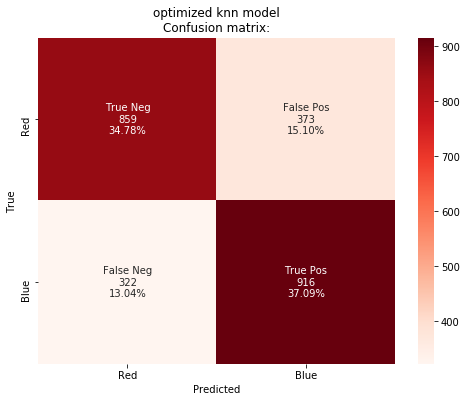

In [22]:
knnModel['confusion matrix'] = showConfusionMatrix(testE,knn_pred,name='optimized knn model')

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


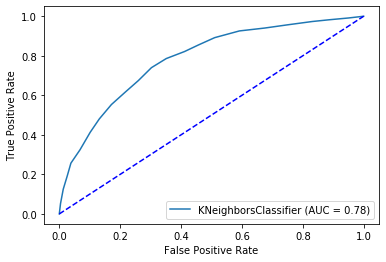

In [23]:
knnModel['roc curve'] = showRocCurve(testD,testE,knn_pred,knn_clf)

### Comparing the results

In [24]:
print("baseline model accuracy:",baseLineModel["accuracy"],"\noptimized knn model accuracy:",knnModel["accuracy"])


baseline model accuracy: 0.6927125506072874 
optimized knn model accuracy: 0.7186234817813765


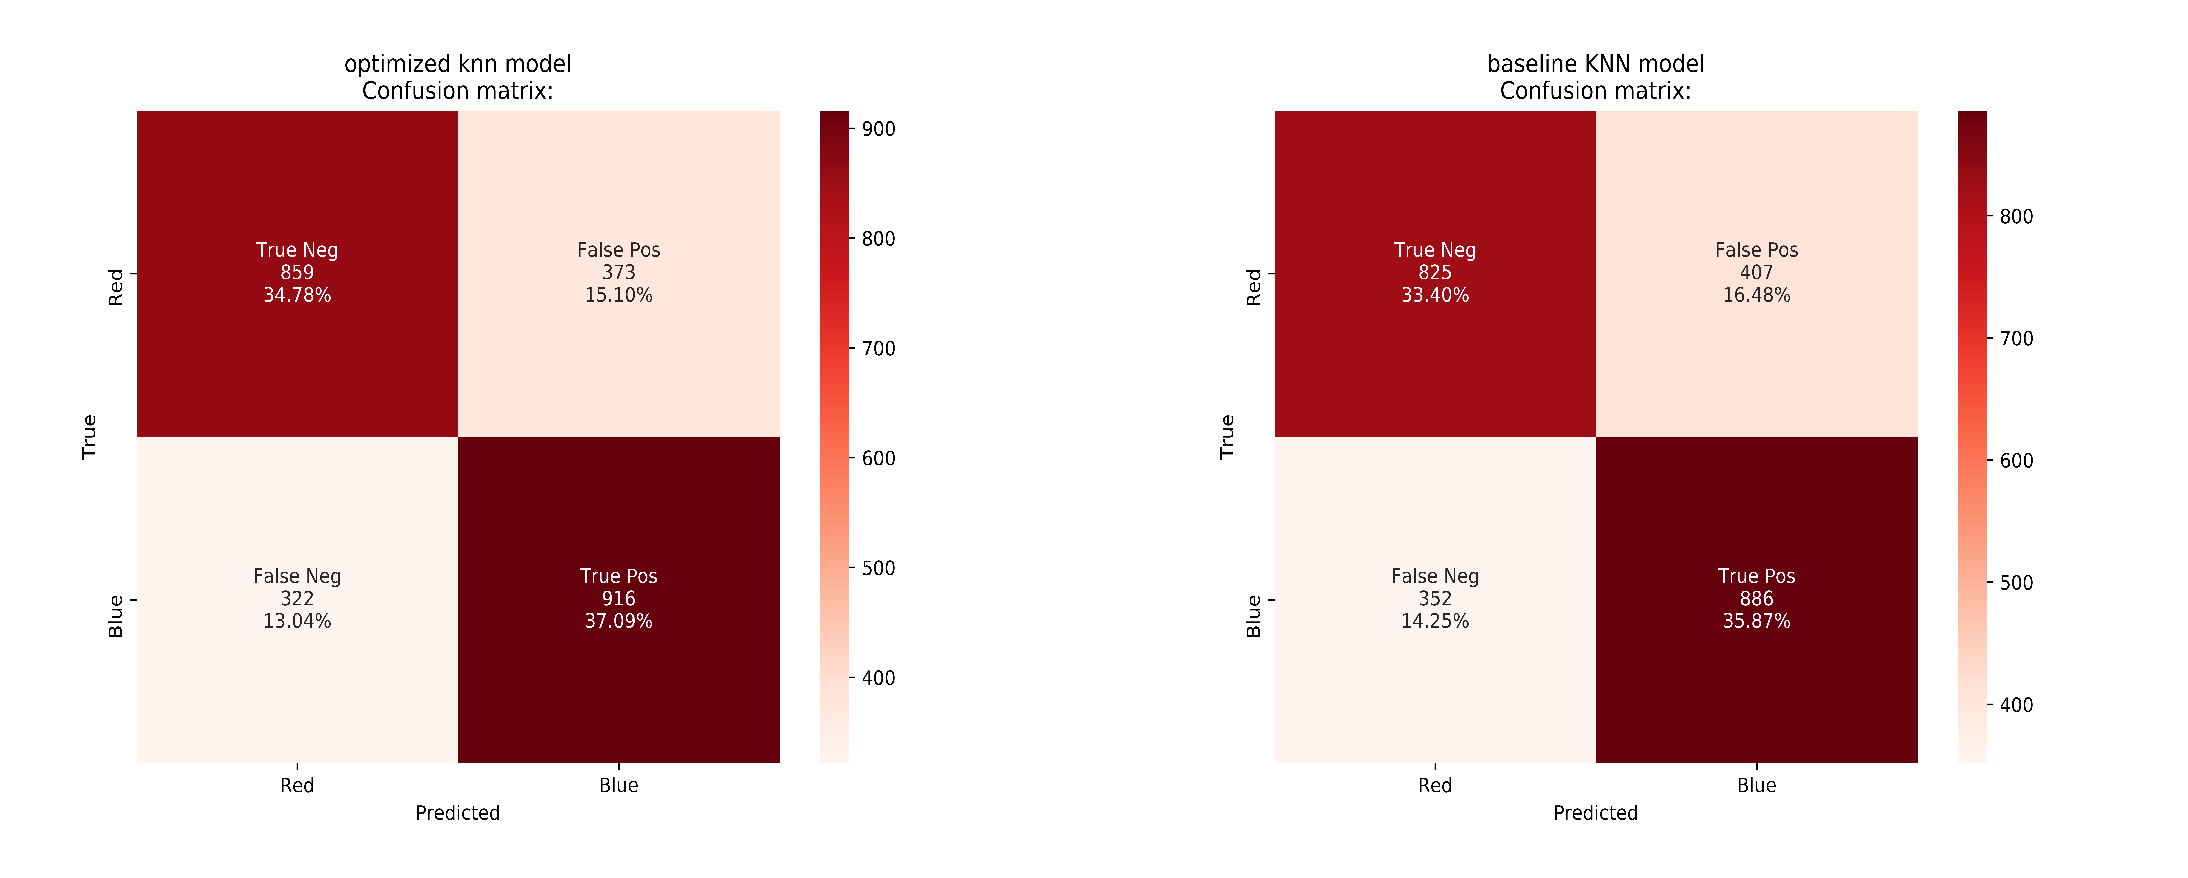

In [25]:
plt.figure(figsize=(32,12))
plt.subplot(121)
plt.imshow(plt.imread(knnModel['confusion matrix']),interpolation='none',
                   
                   extent=[-2, 4, -3, 2], clip_on=True)
plt.axis('off')
plt.subplot(122)
plt.imshow(plt.imread(baseLineModel['confusion matrix']),interpolation='none',
                   
                   extent=[-2, 4, -3, 2], clip_on=True)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


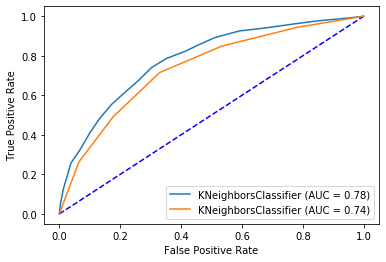

In [27]:
showRocCurve(testD,testE,knn_pred,knn_clf,curves=[baseLineModel["roc curve"]])

As we can see, Knn might not be the best classifier for our task, so instead Let's try using a Support Vector Classifier instead.

## Support Vector Machines

Support Vector Machines are effective when using high dimentions like our dataset

In [28]:
from sklearn.svm import SVC,NuSVC,LinearSVC

### Finding optimal SVM classifier

In [29]:
svcClf = SVC().fit(trainD,trainE)
nuClf = NuSVC().fit(trainD,trainE)
linearClf = LinearSVC().fit(trainD,trainE)

pred1 = svcClf.predict(testD)
pred2 = nuClf.predict(testD)
pred3 = linearClf.predict(testD)


In [30]:
acc1 = showAccuracy(testE,pred1)
acc2 = showAccuracy(testE,pred2)
acc3 = showAccuracy(testE,pred3)

Accuracy score: 0.7319838056680162
Report:
               precision    recall  f1-score   support

        Blue       0.74      0.70      0.72      1232
         Red       0.72      0.76      0.74      1238

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470

Accuracy score: 0.4493927125506073
Report:
               precision    recall  f1-score   support

        Blue       0.43      0.34      0.38      1232
         Red       0.46      0.55      0.50      1238

    accuracy                           0.45      2470
   macro avg       0.45      0.45      0.44      2470
weighted avg       0.45      0.45      0.44      2470

Accuracy score: 0.5696356275303643
Report:
               precision    recall  f1-score   support

        Blue       0.54      0.99      0.70      1232
         Red       0.92      0.16      0.27      1238

    accuracy                           0.57      2

From our test, we cam see that the SVC classifier is best classifier to use, the NuSVC classifier is the worst one to use and the LinearSVC classifier has some interesting results

In [ ]:
#add confusion matrix for svc
cm = showConfusionMatrix(testE,pred1,name="baseline KNN model")

'assets/.png'

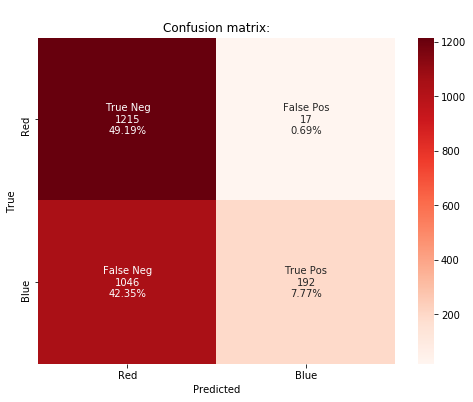

In [31]:
showConfusionMatrix(testE,pred3)

We can see that the linear support vector machine classifier has a very high false positive rate and since we are trying to find the winning team, this classifier will not work for us. In addition, after finding a good LinearSVC classifier, it was not better than the SVC and was highly unstable (this can be found at the end of the notebook).

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


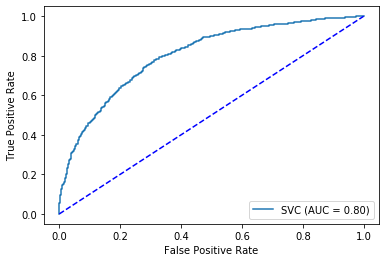

In [32]:
svcRoc = showRocCurve(testD,testE,pred1,svcClf)

In [54]:
baseLineModel_SVM={'prediction':pred1,'confusion matrix':cm,'accuracy':acc1,'roc curve':svcRoc}

### Finding the best parameters

Now that we have chosen our SVM classifier and made a baseline model, we can now look for the optimal settings for our data so that our new model will be better.

In [36]:
#paramaters that may effect the classifications
#we dont need to check the linear kernel since it takes a large amount of time and the linear function is unstable for this dataset
param_grid = [
    {'C':[0.5,1,2,4],'kernel':['rbf','poly'],'degree':[1,3,6],'decision_function_shape':['ovo','ovr']}
]
#change n_jobs for faster/slower performance
gridSearch = GridSearchCV(svcClf,param_grid,cv=5,scoring='accuracy',return_train_score=True,verbose=4,n_jobs=2)


In [37]:
gridSearch.fit(trainD,trainE)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   28.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [0.5, 1, 2, 4],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [1, 3, 6], 'kernel': ['rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=4)

### Displaying results
Let's see how good this model preformed

In [46]:
model = gridSearch.best_estimator_
model.fit(trainD,trainE)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
pred = model.predict(testD)
acc = showAccuracy(testE,pred)

Accuracy score: 0.7299595141700405
Report:
               precision    recall  f1-score   support

        Blue       0.74      0.70      0.72      1232
         Red       0.72      0.76      0.74      1238

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470



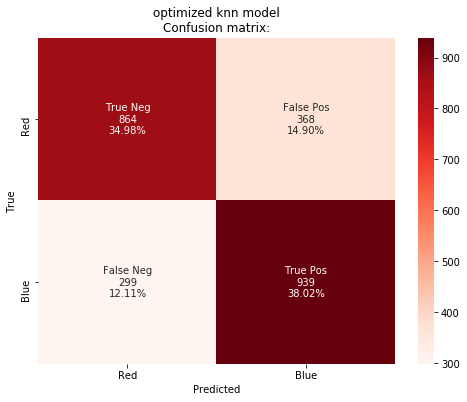

In [48]:
cm = showConfusionMatrix(testE,pred,name="optimized knn model")

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


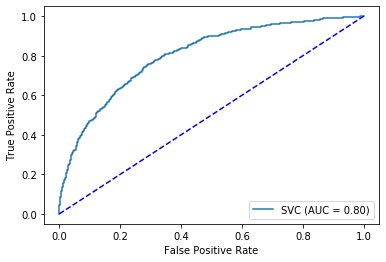

In [49]:
modelRoc = showRocCurve(testD,testE,pred,model)

In [50]:
SVC_model={'prediction':pred1,'confusion matrix':cm,'accuracy':acc1,'roc curve':svcRoc}

In [ ]:
#add baseline vs final

In [51]:
## KNN Vs SVM

In [ ]:
#add concludions

In [52]:
#end

In [53]:
param_grid1=[
    {'C':[0.5,1,2,4],'kernel':['rbf','poly'],'degree':[1,3,6],'decision_function_shape':['ovo','ovr']}
]
param_grid2=[
    {'C':[0.5,0.75,1,2,4],'loss':['hinge', 'squared_hinge']}
]
gridSearch1 = GridSearchCV(svcClf,param_grid1,cv=5,scoring='accuracy',return_train_score=True,verbose=4,n_jobs=2)
gridSearch2 = GridSearchCV(linearClf,param_grid2,cv=5,scoring='accuracy',return_train_score=True,verbose=4,n_jobs=2)